# Проект "Видеоигры"

**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox или PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План**

**Шаг 1. Изучение общей информации о данных**

**Шаг 2. Подготовка данных**

**Шаг 3. Исследовательский анализ данных**

**Шаг 4. Портрет пользователя каждого региона**

**Шаг 5. Проверка гипотезы**

**Шаг 6. Общий вывод**

**Описание данных**


*Name* — название игры


*Platform* — платформа


*Year_of_Release* — год выпуска


*Genre* — жанр игры


*NA_sales* — продажи в Северной Америке (миллионы проданных копий)


*EU_sales* — продажи в Европе (миллионы проданных копий)


*JP_sales* — продажи в Японии (миллионы проданных копий)


*Other_sales* — продажи в других странах (миллионы проданных копий)


*Critic_Score* — оценка критиков (максимум 100)


*User_Score* — оценка пользователей (максимум 10)


*Rating* —  рейтинг от организации *ESRB (англ. Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение общей информации о данных



**Вывод**
- Необходимо привести столбец Year of Release к типу 'int', т.к. год - целочисленное значение.
- Необходимо привести столбец User_Score к типу 'float' (на начальном этапе в этом столбце тип 'object')
- Необходимо привести к нижнему регистру названия столбцов таблицы.
- Имеются пропущенные значения в столбцах rating, user_score, critic_score, year of release. В дальнейшей предобратботке данных подумаем, как с ними поступить.

In [1]:
#Импортируем нужные для работы над проектом библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
#Прочитаем и изучим первые 10 строк датасета, а также общую информацию о нём
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

**Вывод**

1. Привели названия столбцов и данных в столбцах к нижнему (змеиному) регистру


2. Пропуски
* В столбце *name* пропущенно 2 значения, что безусловно, ничтожно мало по сравнению с 16715 строками всего датасета, поскольку это никак не скажется на анализе, оставляем без изменений.

* В столбце *year_of_release* пропущено 1.6% значений, что опять же мало по сравнению со всем датасетом, поэтому также оставляем без изменений.


* Столбцы *critic_score* и *user_score* пропущенно 51.3% значений и 40.1% значений соответственно.

Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. То же самое справедливо и для столбца 'user_score'. Ведь оценки играм пользователям нужно было где-то размещать в сети. Также, так как данные за неполный 2016 год, то и там логично наблюдать пустые значения.

Пропущенных значений в этих столбцах слишком много для удаления. Да, большинство из них относится к более ранним годам, но и среди них могут быть полезные для анализа и выявления закономерностей данные, поэтому пока оставим без изменений.

* В столбце *raiting* пропущено 40.5% значений

Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг. Пропущенных данных в этом столбце достаточно много, хотя они в большинстве своём отсносятся к 90-ым годам и ранее, попробуем их оставить.


* *Примечание по пропускам*:  если заполним пропущенные оценки, рейтинг в зависимости от продаж, то искусственно увеличим корреляцию между этими параметрами. А если это делать после того, как уже посчитали корреляцию, то встаёт вопрос о целесообразности этого действия. Можно попытаться ответить на вопрос: "Дальше эти данные будут использоваться?" Пока что из задания, кажется, что нет.

4. Аббревиатура TBD имеет несколько расшифровок. В игровой сфере это обычно означает 'To Be Determined' - 'Будет определено'. Т.е. это то же самое, что неизвестное значение. Поэтому, произвели замену значение 'tbd' на 'NaN'.


5. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец *total_sales*



6. Дубликаты в датасете отсутствуют.

### Приведение данных к нижнему регистру

In [4]:
#Приведем названия столбцов к змеиному регистру
games.columns = games.columns.str.lower()
games.columns
#Приведем данные к змеиному регистру и проверим, как теперь выглядит датасет
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
923,wcw nitro,ps,1998.0,fighting,1.42,0.36,0.03,0.07,NaN,NaN,NaN
12757,real soccer 2009,ds,2008.0,sports,0.05,0.00,0.00,0.00,70.0,tbd,e
14426,totally spies!,gba,2005.0,platform,0.02,0.01,0.00,0.00,NaN,NaN,NaN
3520,rapala: we fish,wii,2009.0,sports,0.52,0.01,0.00,0.04,NaN,tbd,e
6068,beatmania append 4thmix: the beat goes on,ps,1999.0,simulation,0.00,0.00,0.27,0.02,NaN,NaN,NaN
4667,crash of the titans,ps2,2007.0,action,0.34,0.01,0.00,0.06,70.0,5.9,e10+
10420,taiko no tatsujin: v version,psv,2015.0,action,0.00,0.00,0.10,0.00,NaN,NaN,NaN
13966,warriors orochi 3,xone,2014.0,action,0.01,0.03,0.00,0.00,NaN,NaN,NaN
10911,the smurfs 2,wii,2013.0,platform,0.00,0.09,0.00,0.01,NaN,tbd,e
384,clubhouse games,ds,2006.0,misc,0.59,1.79,0.73,0.34,83.0,8.4,e


### Работа с пропусками

In [5]:
#Посчитаем количество пустых значений.
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#создадим функцию, чтобы знать точный процент пропусков в столбце:
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(games[column].isna().value_counts()[1] / len(games), 2) + ' значений')

In [7]:
#Изучим подробнее таблицу с пустыми значениями в столбце critic_score.
display(games[games['critic_score'].isna()])
print_nan_ratio('critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущено 51.3% значений


In [8]:
#Изучим подробнее таблицу с пустыми значениями в столбце user_score.
display(games[games['user_score'].isna()])
print_nan_ratio('user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущено 40.1% значений


In [9]:
#Изучим подробнее таблицу с пустыми значениями в столбце rating.
display(games[games['rating'].isna()])
print_nan_ratio('rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущено 40.5% значений


In [10]:
#Посмотрим на таблицу с пустыми значениями в столбце year_of_release
display(games[games['year_of_release'].isna()])
print_nan_ratio('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущено 1.6% значений


In [11]:
games.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

In [12]:
#Проанализируем какие платформы для игр находятся в датасете.
games['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       98
dc        52
gen       29
ng        12
ws         6
scd        6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

In [13]:
#Заменим tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Приведение данных к нужному типу

In [15]:
# Приведем годы и оценки критиков в целочисленный тип
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Оценки пользователей приведем к типу float
games['user_score'] = games['user_score'].astype('float')

### Изучение датасета на присутствие дубликатов

In [16]:
#Проанализируем, какие жанры игр есть в датасете и нет ли неявных дубликатов
games['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

In [17]:
#Посчитаем количество явных дубликатов.
games.duplicated().sum()

0

## Исследовательский анализ данных


**Вывод по исследовательскому анализу данных:**


* Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с *90х годов до 2008 года.* С *2008 года*, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
* Самые популярные игровые платформы за весь период : *Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.*
* Средняя жизнь игровой платформы составляет *8-10 лет.* Пик продаж наступает примерно *через 5 лет* после выхода приставки.
* Больше всего было продано игр на *Sony Playstation и Xbox 360.*
* У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что *для людей мнение критиков важнее мнения других пользователей.*
* Самый популярный жанр за последние 10 лет: *Action*. Наименее популярный - *Puzzle*.

### Сколько игр выпускалось в разные годы

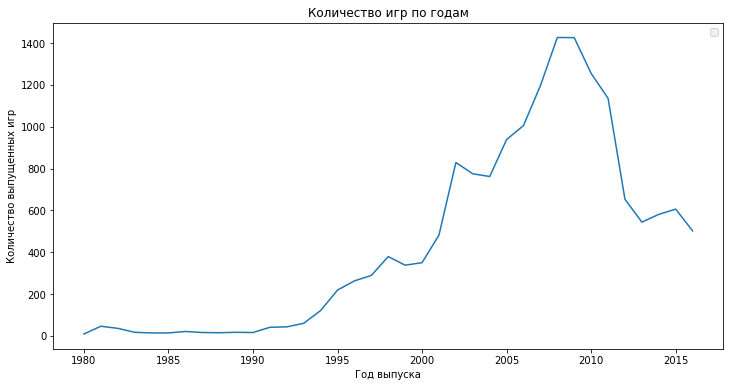

In [18]:
games_by_each_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

- Из графика видно, что с начала 90-х годов количество игр начинает ежегодно расти быстрыми темпами. Можно попробовать это объяснить развитием компьютеров: широким внедрением CD-ROM для распространения и хранения данных, распространением операционных систем, таких как Microsoft Windows и Mac OS, основывающихся на GUI. Не последнее место сыграло существенное развитие технологий трехмерной графики. Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation, позже XBOX. Данный рост продолжается до 2008 года.

- В конце 90-х растущие скорости доступа в интернет делают возможным становление браузера как самостоятельной игровой платформы. В середине двухтысячных наступает экспоненциальный рост социальных сетей, которые становятся новым способом общения между людьми. Разработчики игр теперь просто не могут игнорировать браузерную платформу и внутри нее выделяется отдельная платформа и игры под нее. Все это, плюс появление мобильных платформ iOS и Android как раз на рубеже 2008 года, поспособствовало частичной смене акцентов в пользу мобильных приложений и мобильных игр. Отсюда виден резкий спад консольных игр, начиная с 2009 по 2016гг.

### Как менялись продажи по платформам. Выбор платформ с наибольшими суммарными продажами и построение распределения по годам

Text(0, 0.5, 'Количество продаж')

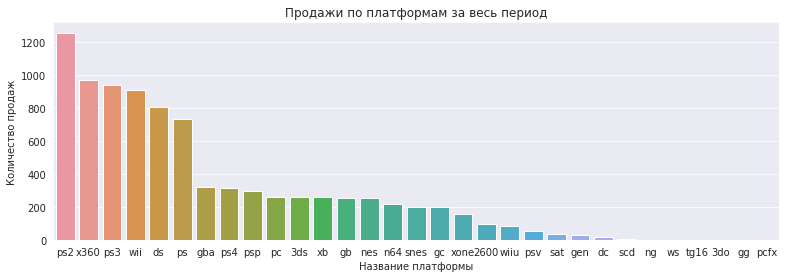

In [19]:
sales_on_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

In [20]:
platform_grouped = sales_on_platform.reset_index()
#Составим список всех платформ.
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

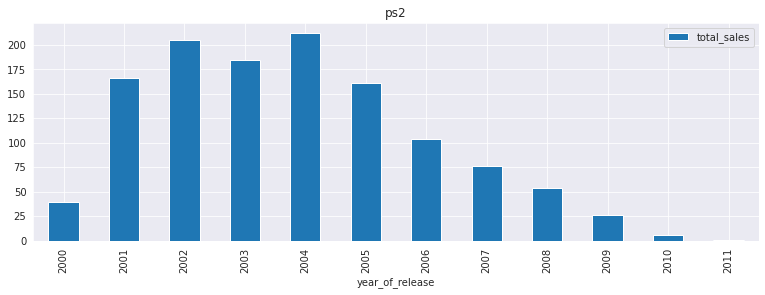

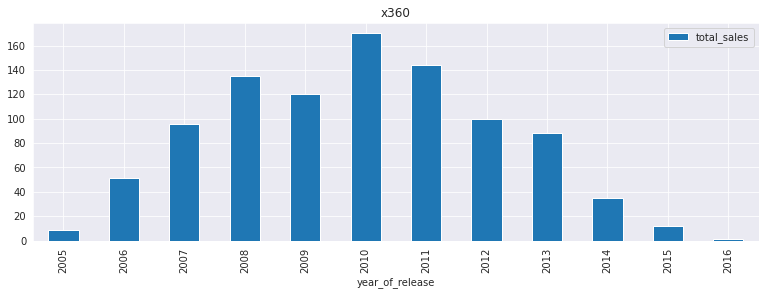

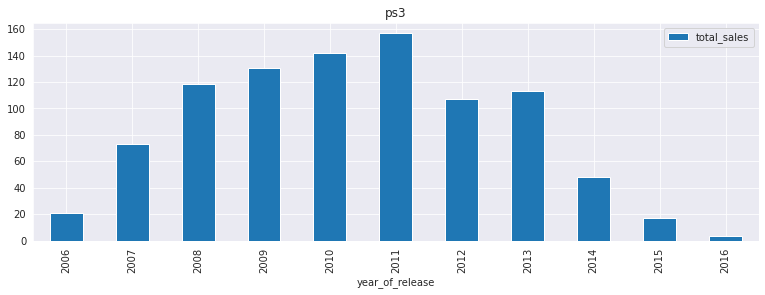

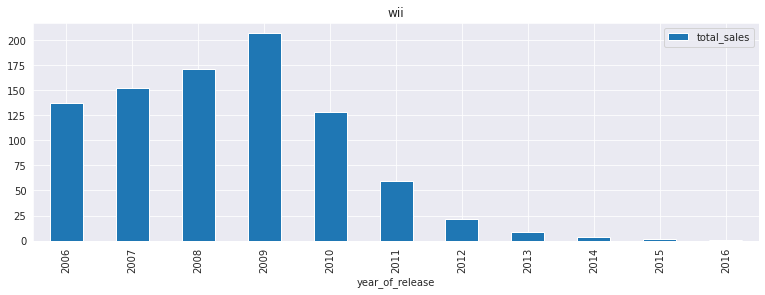

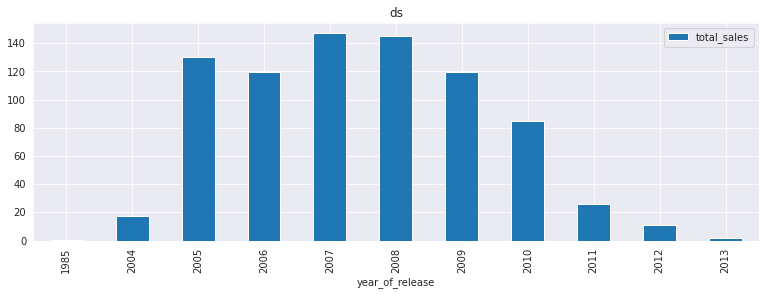

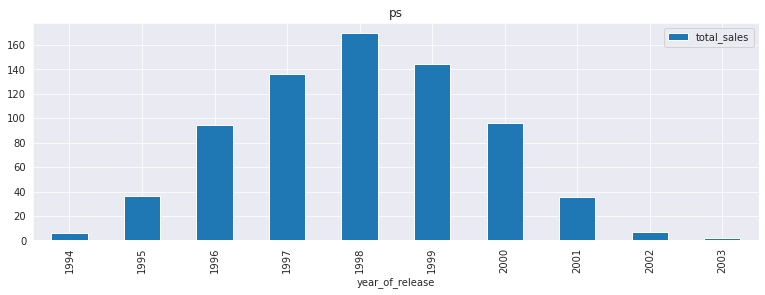

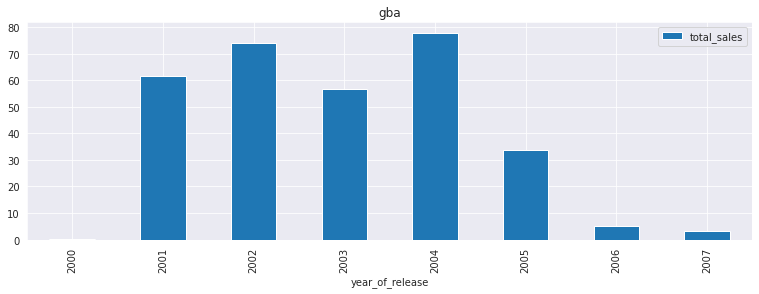

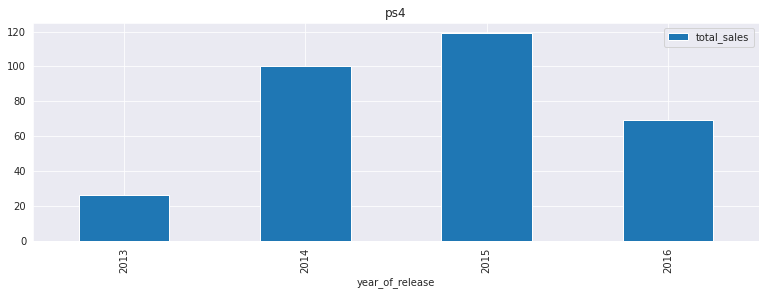

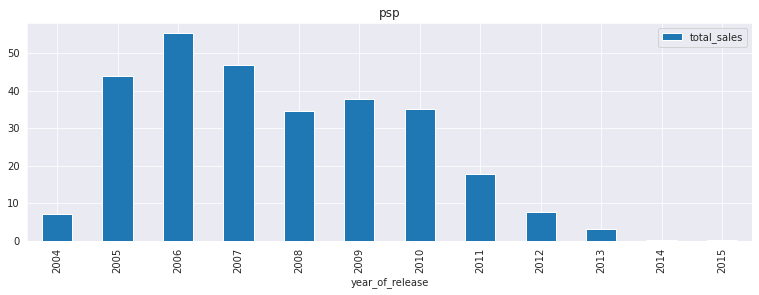

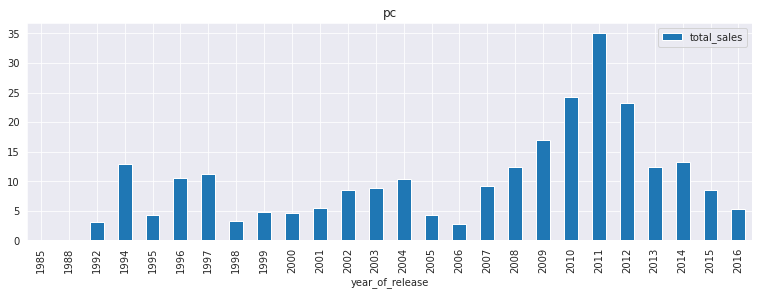

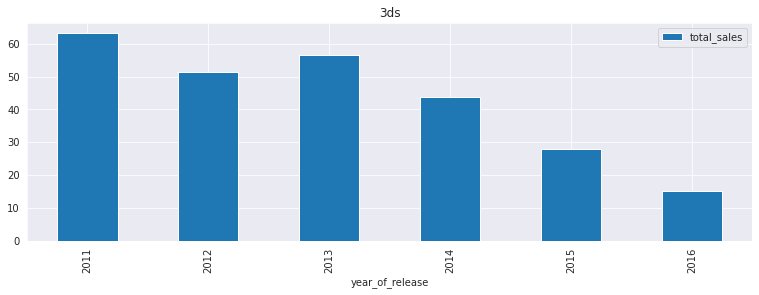

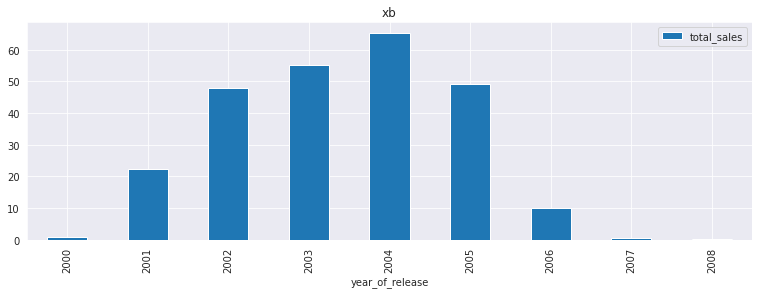

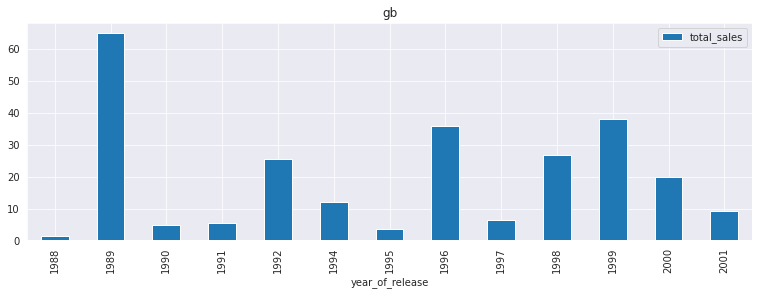

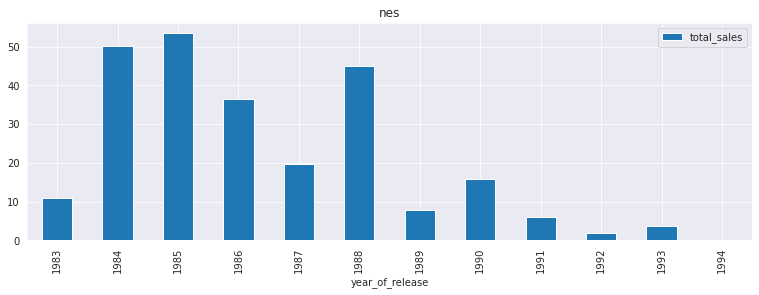

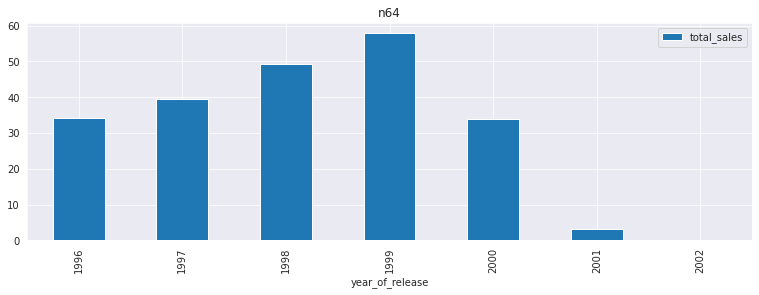

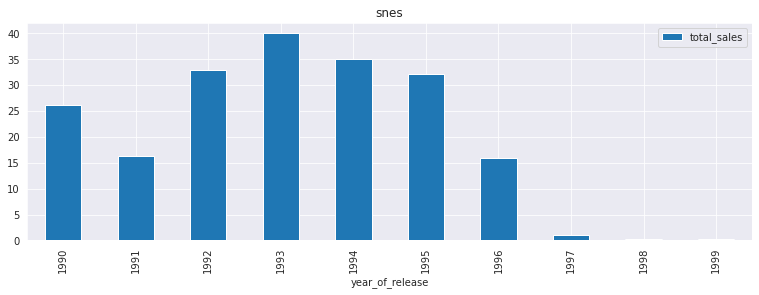

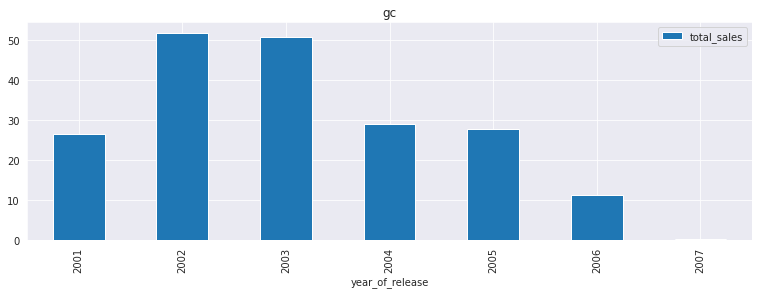

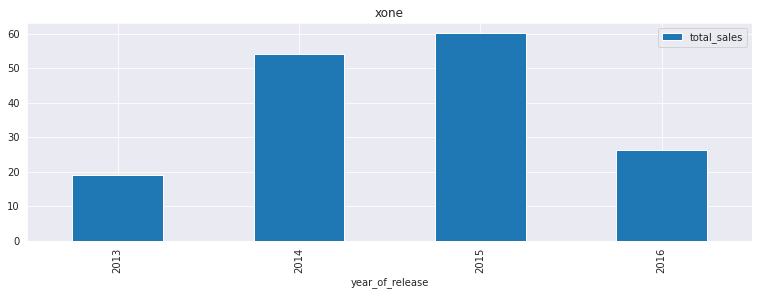

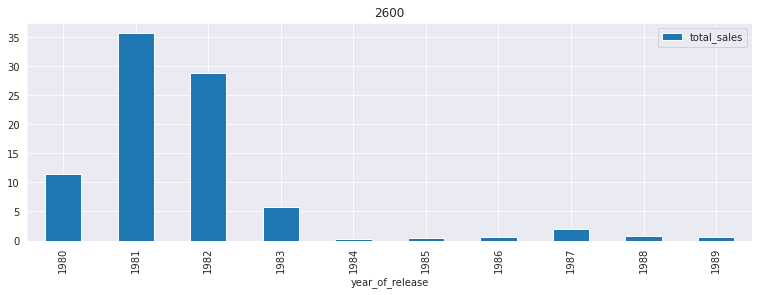

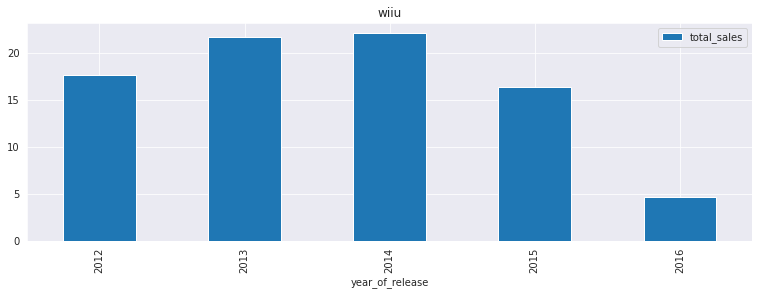

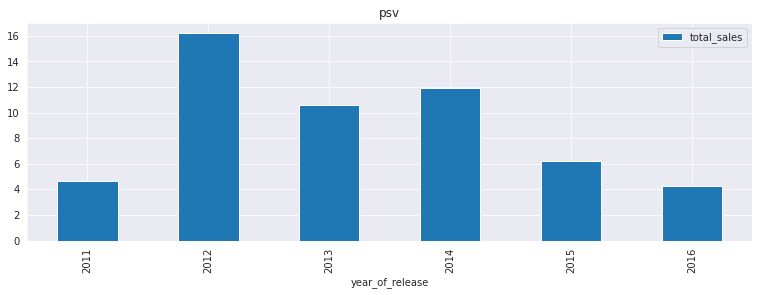

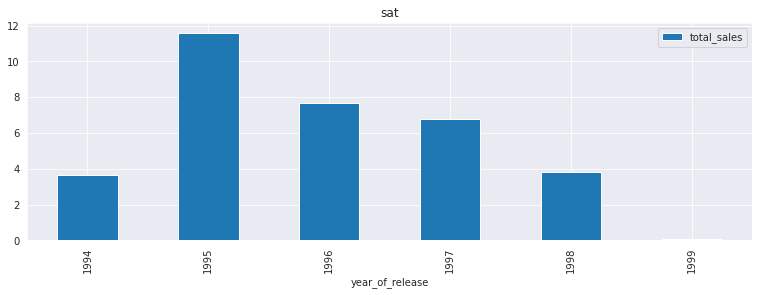

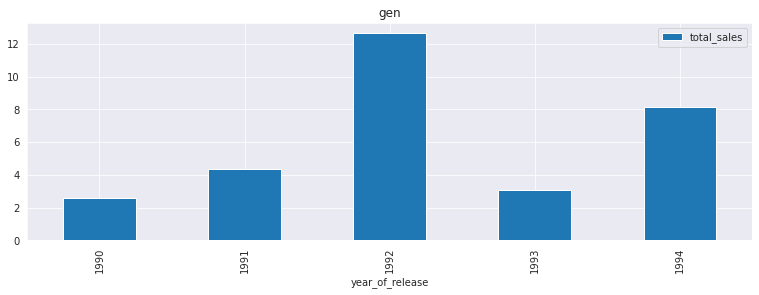

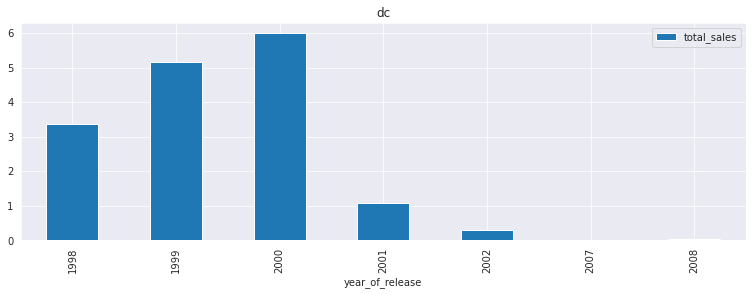

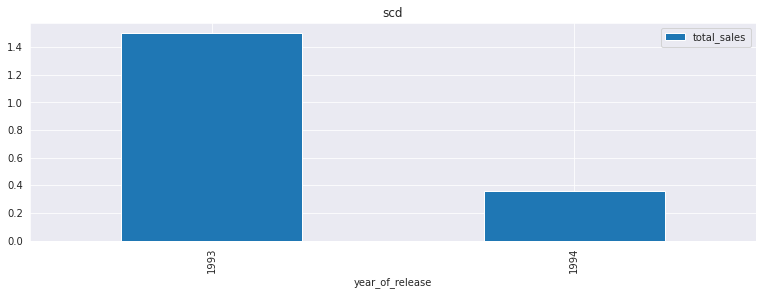

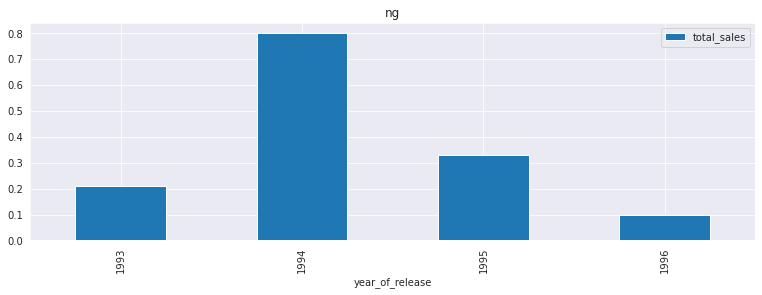

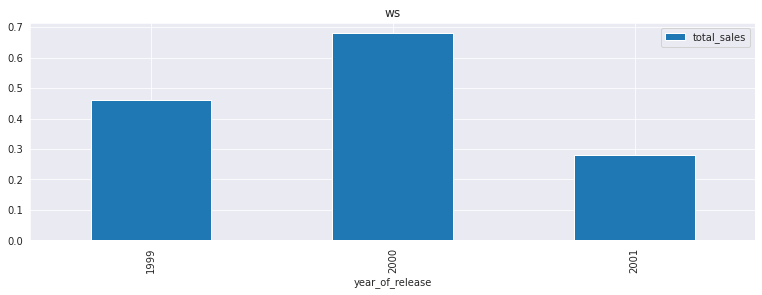

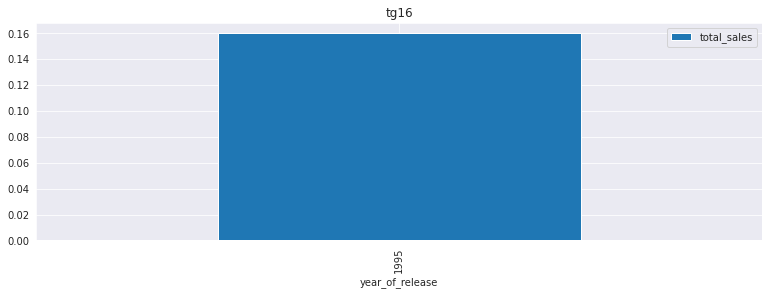

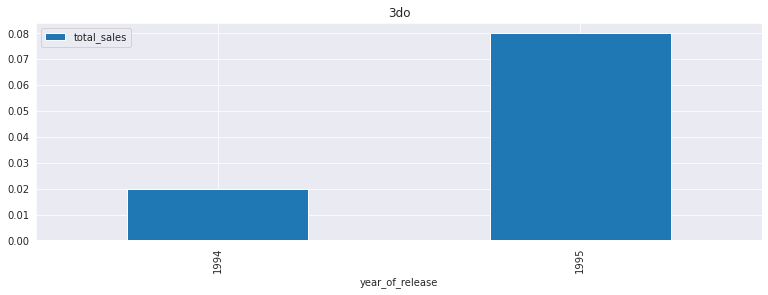

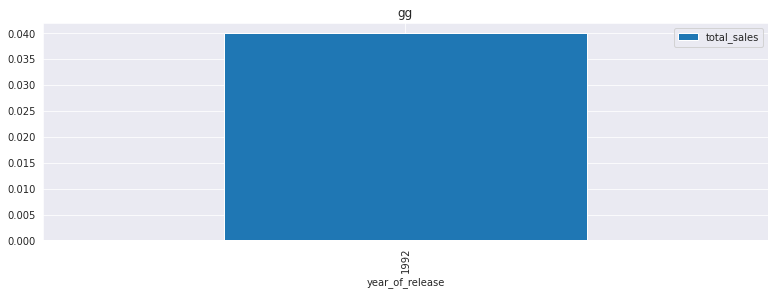

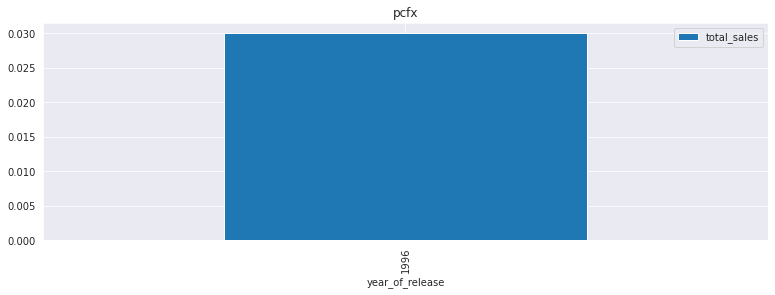

In [21]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms_list:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

In [22]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [23]:
# Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


- Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет.
- Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свое могущество на момент 2016 года.
- Большая часть платформ из нашего списка уже неактуальна. Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.  

### Определение актуального периода

In [24]:
# Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка
# последних годов.
# Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.
# При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только
# конечный на данный момент интервал развития игровой индустрии.
decline_period_data = games[games['year_of_release'] > 2009]
decline_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
27,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Выбор потенциально прибыльных платформ

In [25]:
#Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.
#Сохраним в переменной df_top_5_platforms только последние поколения платформ и избавимся от выбросов
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = decline_period_data[decline_period_data['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [26]:
games_top_6_platforms['total_sales'].describe()

count    2040.000000
mean        0.207000
std         0.271788
min         0.010000
25%         0.030000
50%         0.090000
75%         0.260000
max         1.390000
Name: total_sales, dtype: float64

In [27]:
#Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,477.0,0.214990,0.266597,0.01,0.04,0.11,0.260,1.39
pc,461.0,0.171280,0.239085,0.01,0.03,0.07,0.200,1.36
ps4,326.0,0.258558,0.298397,0.01,0.05,0.12,0.360,1.32
psv,426.0,0.114648,0.168551,0.01,0.02,0.05,0.130,1.31
wiiu,135.0,0.294222,0.302792,0.01,0.07,0.19,0.420,1.30
xone,215.0,0.315907,0.364930,0.01,0.05,0.16,0.455,1.39


Text(0, 0.5, 'Глобальные продажи')

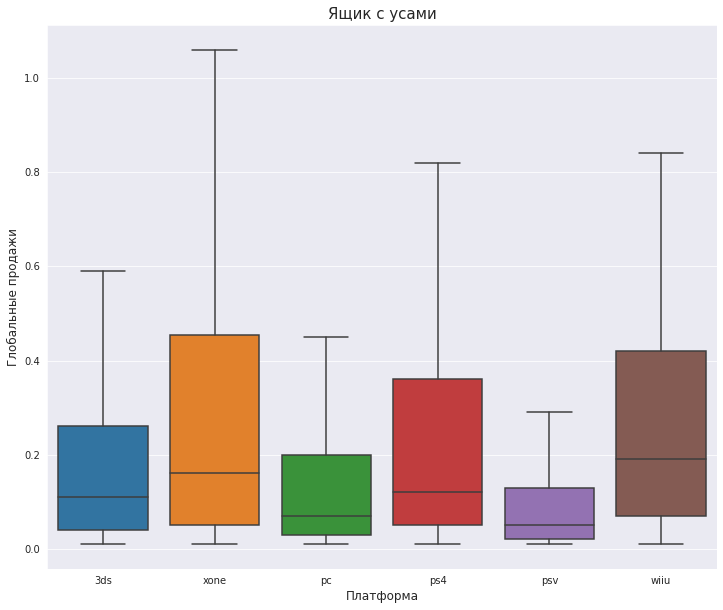

In [28]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales', showfliers=False)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

- Исходя из графиков видно, что медиана протекает у всех по разному.
- Больше всех продаж у WiiU, затем XOne, после PS4, 3DS, PC и PSV на последнем месте.
- Успех WiiU можно попробовать объяснить наличием в данной модели нового контроллера, который мог использоваться как дополнительный сенсорный экран. Также браузер WiiU на момент ее выхода (конец 2012 года) был одним из лучших среди домашних консолей.
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.
- ПК на данном промежутке времени потеряли былую популярность, уступив приставкам.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

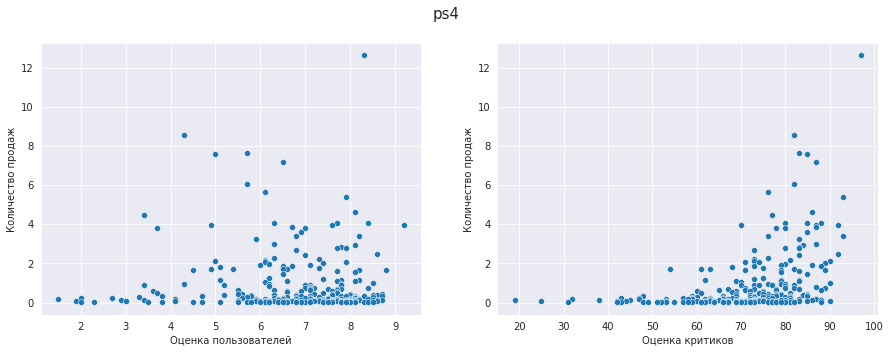

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40656790206178095


Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.031957110204556376




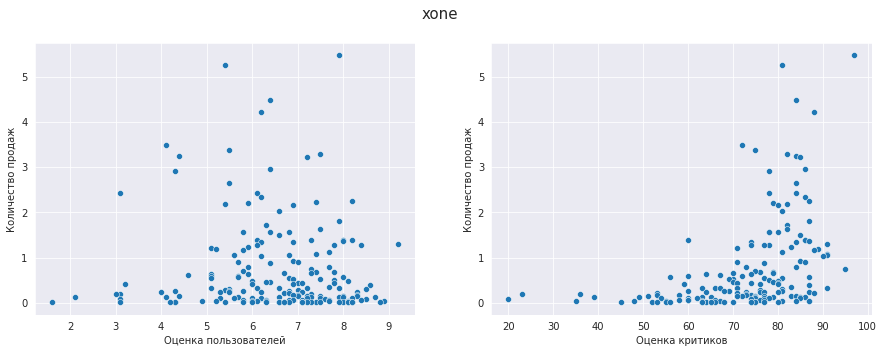

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084017


Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.06892505328279414




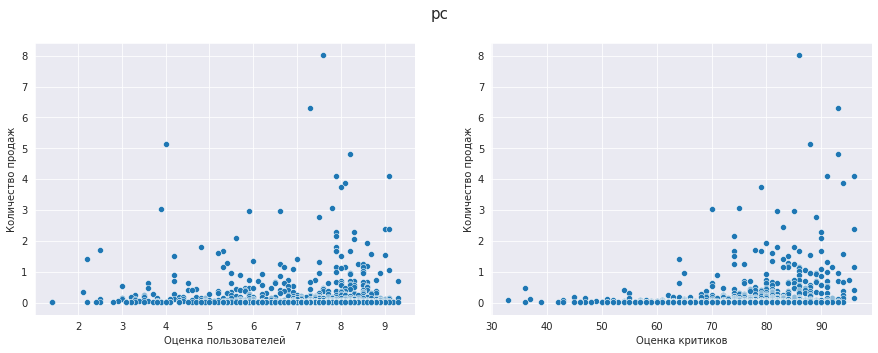

Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.25688673789482114


Корреляция между отзывами пользователей и продажами  PC : Корреляция не выявлена 0.01047568462148642




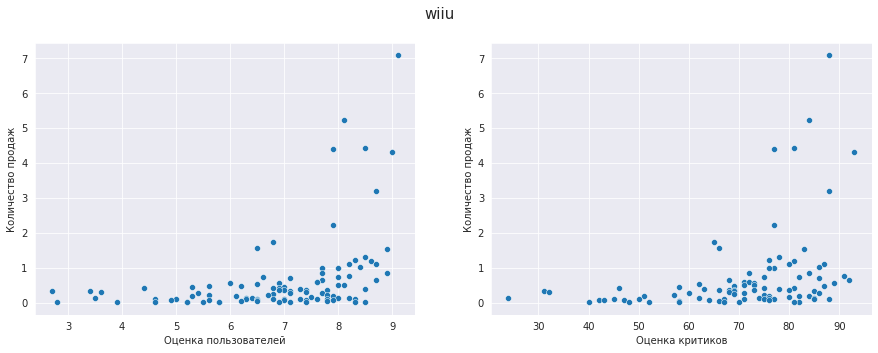

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.34837976012017485
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.4002190202148617






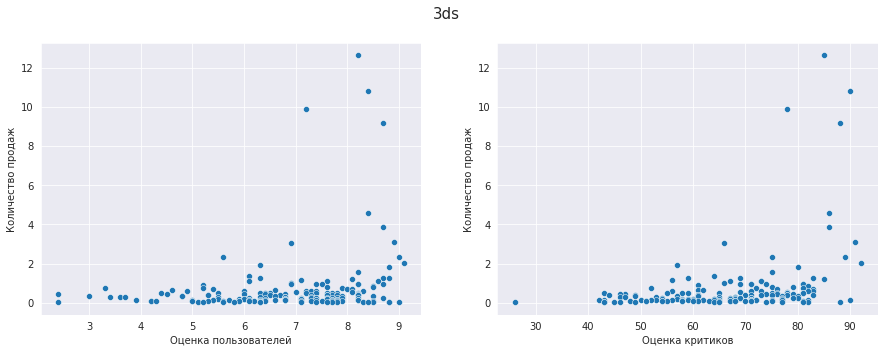

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.3494009303924131
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571082






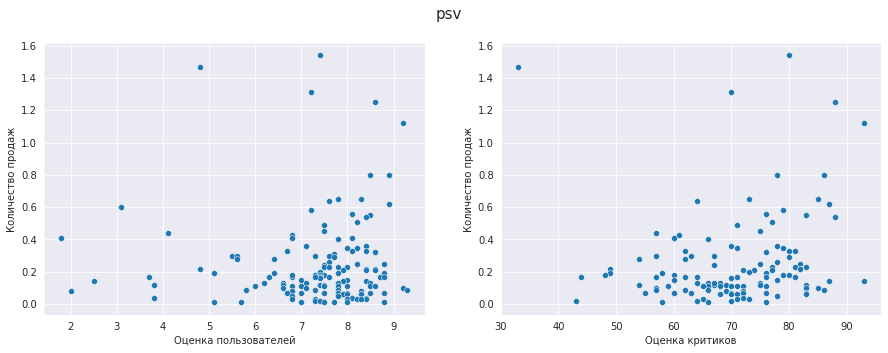

Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.1315167215429264


Корреляция между отзывами пользователей и продажами  PSV : Корреляция не выявлена 0.013579522883028902




In [29]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')
    
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', correl)
    if -0.9 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', correl)
    print('\n')
    
    
for platform in list_of_top_6:
    other_platform_matrix(platform)

**Вывод:**

У PS4, Xbox One, WiiU, 3DS наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Интересное наблюдение. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, данная аксиома не распространяется на платформу WiiU: там определяют пользователи.

### Общее распределение игр по жанрам

In [50]:
#Посмотрим на общее распределение игр по жанрам.
#Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
distr_genre = games_top_6_platforms.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,shooter,0.330956
1,sports,0.288600
2,platform,0.280469
3,fighting,0.253770
4,role-playing,0.240260
5,action,0.200402
6,racing,0.190230
7,simulation,0.188043
8,misc,0.179720
9,puzzle,0.141905


Text(0, 0.5, 'Продажи')

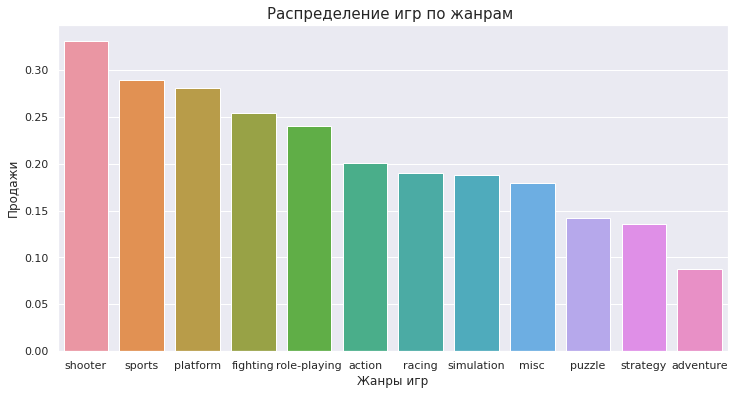

In [51]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Средние Продажи',fontsize=12)

Безусловный лидер -  жанр 'Action'. 'Puzzle' на последнем месте. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр.

##  Портрет пользователя каждого региона

**Вывод по составлению портрета пользователя каждого региона**


Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год: То в Северной Америке: топ игровых платформ выглядит так: PS4, Xone, DS3; Топ Жанров игр: Shooter, Action, Sports; Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".

В Европейском Союзе: Топ игровых платформ : PS4, Xone, PC; Топ жанров: Shooter, Sports, Action; Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".

В Японии: Топ игровых платформ : 3DS, PS4, PSV; Топ жанров: Action, Role-playing, Adventure; Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".

Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.

In [32]:
#Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5), влияние рейтинга ESRB на продажи.
#Функция для создания сводбных таблиц за весь период
def user_portrait(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes):
        ppivot = games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def user_portrait_2016(row, title):
    temp = games[games['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)

        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

### Портрет пользователя North America

**Вывод:**

* Самые популярные игровые платформы в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS.
* Топ 5 жанров в Северной Америке за все время: action, sports, shooter, platform, misc.
* По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".


Если же взять данные за последний год, то общая картина заметно меняется:


* Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, PC.
* Топ жанров игр: Shooter, Action, Sports, Role-Playing, Fighting.
* Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех".

,platform,na_sales
0,x360,602.47
1,ps2,583.84
2,wii,496.90
3,ps3,393.49
4,ds,382.40


,genre,na_sales
0,action,879.01
1,sports,684.43
2,shooter,592.24
3,platform,445.50
4,misc,407.27


,rating,na_sales
0,e,1292.99
1,t,759.75
2,m,748.48
3,e10+,353.32
4,k-a,2.56


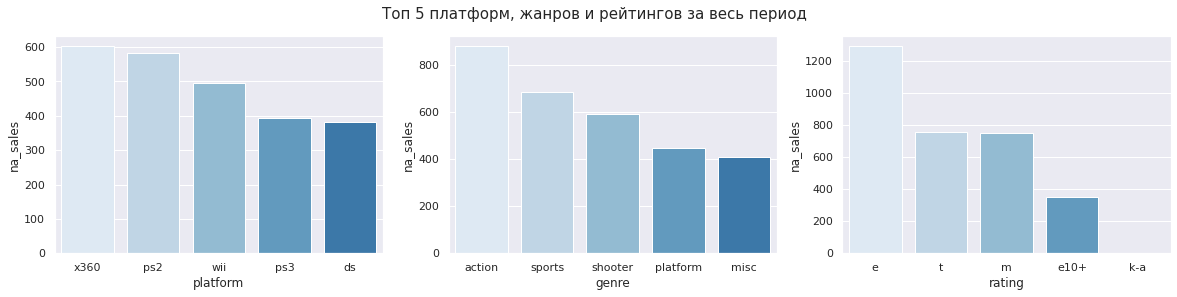

In [33]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,na_sales
0,ps4,21.49
1,xone,14.27
2,3ds,4.14
3,wiiu,2.10
4,pc,1.36


,genre,na_sales
0,shooter,16.24
1,action,9.29
2,sports,7.54
3,role-playing,5.89
4,fighting,1.84


,rating,na_sales
0,m,15.67
1,t,8.95
2,e,7.97
3,e10+,3.81


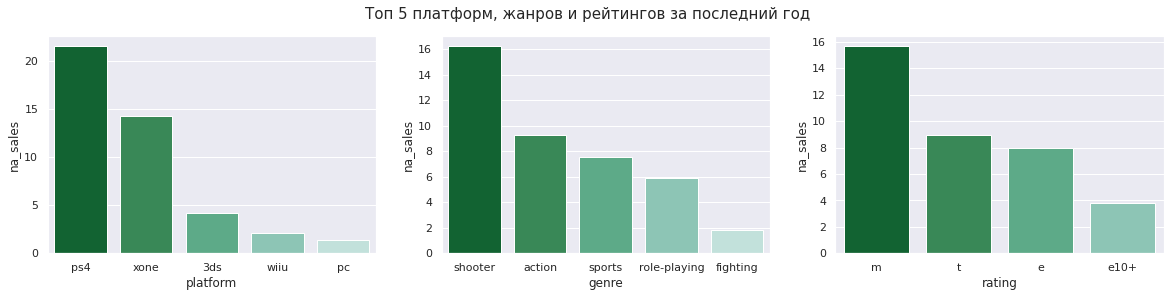

In [34]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

### Портрет пользователя European Union

**Вывод:**

* Самые популярные игровые платформы в Европе за все время это: PS2, PS3, X360, WII, PS.
* Топ 5 жанров в Европе за все время: action, sports, shooter, racing, misc.
*По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Если же взять данные за последний год, то общая картина заметно меняется:

* Топ игровых приставок выглядит таким образом : PS4, Xone, PC, 3DS, WiiU.
* Топ жанров игр: Shooter, Sports, Action, Role-Playing, Racing.
* Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

,platform,eu_sales
0,ps2,339.29
1,ps3,330.29
2,x360,270.76
3,wii,262.21
4,ps,213.61


,genre,eu_sales
0,action,519.13
1,sports,376.79
2,shooter,317.34
3,racing,236.51
4,misc,212.74


,rating,eu_sales
0,e,710.25
1,m,483.97
2,t,427.03
3,e10+,188.52
4,ao,0.61


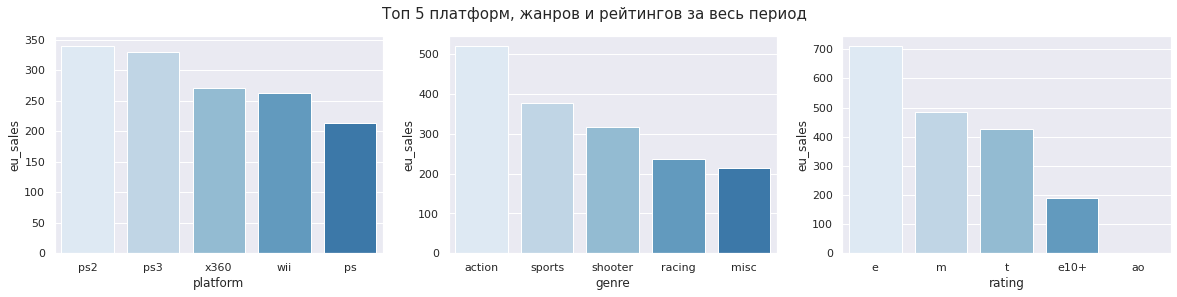

In [35]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,eu_sales
0,ps4,31.78
1,xone,9.63
2,pc,3.53
3,3ds,2.33
4,wiiu,1.48


,genre,eu_sales
0,shooter,15.90
1,sports,12.01
2,action,10.68
3,role-playing,4.28
4,racing,1.77


,rating,eu_sales
0,m,16.54
1,e,13.61
2,t,9.79
3,e10+,3.81


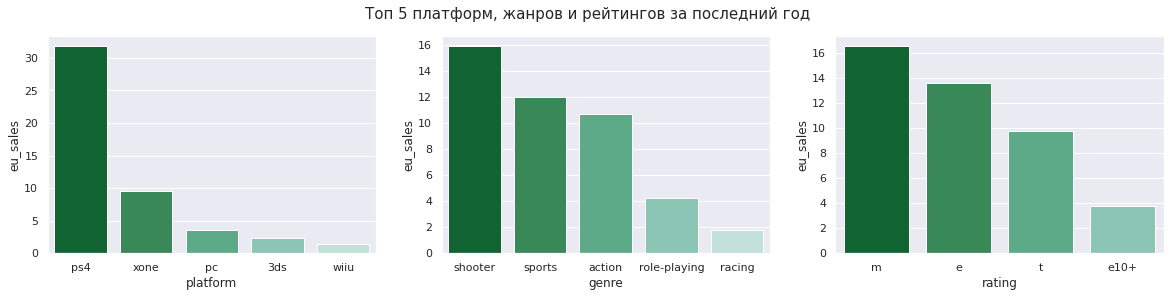

In [36]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год')

### Портрет пользователя Japanese

**Вывод:**

* Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS.
* Топ 5 жанров в Японии за все время: role-playing, action, sports, platform, misc.
* По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если же взять данные за последний год, то общая картина заметно меняется:

* Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3, WiiU.
* Топ жанров игр: Action, Role-Playing, Adventure, Shooter, Misc.
* Топ рейтингов: "От 13 и выше", "От 17 и выше" и "Для всех".

,platform,jp_sales
0,ds,175.57
1,ps,139.82
2,ps2,139.20
3,snes,116.55
4,3ds,100.67


,genre,jp_sales
0,role-playing,355.41
1,action,161.43
2,sports,135.54
3,platform,130.83
4,misc,108.11


,rating,jp_sales
0,e,198.11
1,t,151.40
2,m,64.24
3,e10+,40.20
4,k-a,1.46


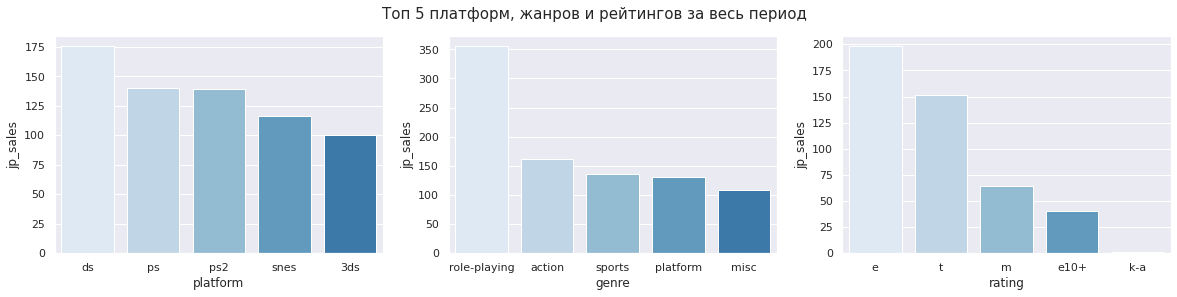

In [37]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,jp_sales
0,3ds,8.03
1,ps4,5.74
2,psv,3.56
3,ps3,1.30
4,wiiu,0.67


,genre,jp_sales
0,action,7.07
1,role-playing,6.61
2,adventure,1.18
3,shooter,1.06
4,misc,1.04


,rating,jp_sales
0,t,2.27
1,m,1.20
2,e,1.07
3,e10+,0.45


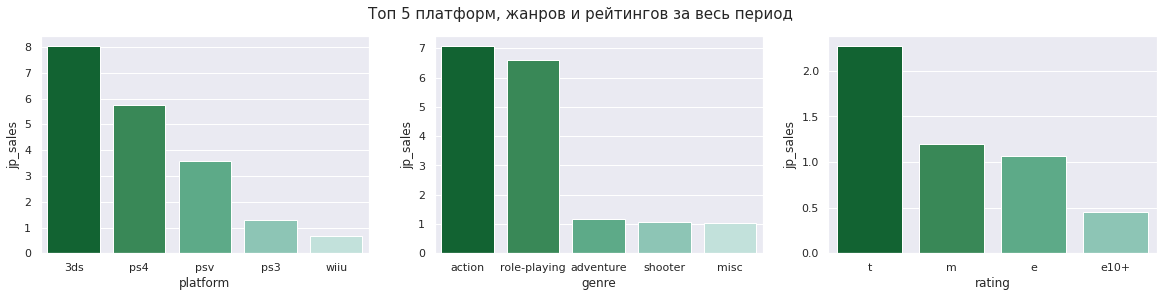

In [38]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

<AxesSubplot:xlabel='genre-rating', ylabel='platform'>

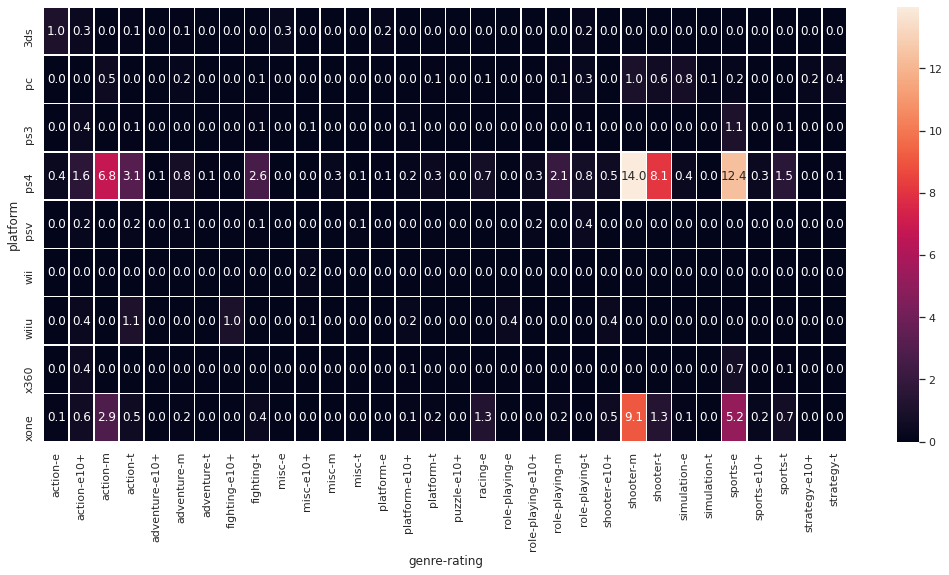

In [39]:
#Визуализируем суммарные продажи игр по жанрам, рейтингу и платформам.
platform_genre_sales = games[games['year_of_release']>2015].pivot_table(
    index='platform', columns=['genre', 'rating'], values='total_sales', aggfunc='sum').fillna(0).applymap(float)
plt.figure(figsize=(18,8))
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

## Проверка гипотез

### Гипотеза о равенстве пользовательских рейтингов для платформ Xbox One и PC

Сформулируем нулевую и альтернитвную гипотезы:


* **Нулевая гипотеза H₀:** *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*
* **Альтернативная гипотеза H₁:** *Средние пользовательские рейтинги платформ Xbox One и PC различаются*


**Вывод:** Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 3.7%, чтобы можно было получить различность рейтингов двух платформ

In [40]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = games[(games['platform']=='xone') & (games['year_of_release']>2006)]['user_score']
pc_hyp = games[(games['platform']=='pc') & (games['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.521428571428572

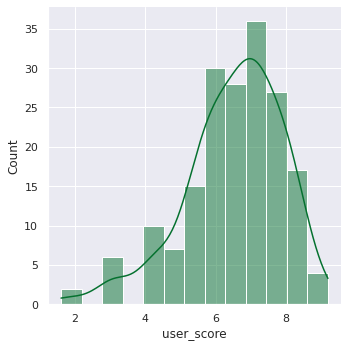

In [63]:
#визуализируем распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
sns.displot(xone_hyp, kde=True)

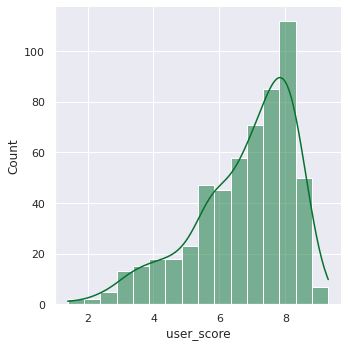

In [62]:
sns.displot(pc_hyp, kde=True )

In [41]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.765499124343257

In [42]:
# Произведем проверку дисперсии выборок
np.var(games[games['platform']=='xone']['user_score'])

1.8965188383045526

In [43]:
np.var(games[games['platform']=='pc']['user_score'])

2.3377471580367684

In [44]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04401892858926167
Не получилось отвергнуть нулевую гипотезу


### Гипотеза о равенстве пользовательских рейтингов для платформ Xbox One и PC

Сформулируем нулевую и альтернитвную гипотезы:

* **Нулевая гипотеза H₀:** *Средние пользовательские рейтинги жанров Action и Sports одинаковые.*
* **Альтернативная гипотеза H₁:** *Средние пользовательские рейтинги жанров Action и Sports различаются.*

**Вывод:** Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

In [45]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = games[(games['genre']=='action') & (games['year_of_release']>2006)]['user_score']
genre_sports_hyp = games[(games['genre']=='sports') & (games['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.836079077429983

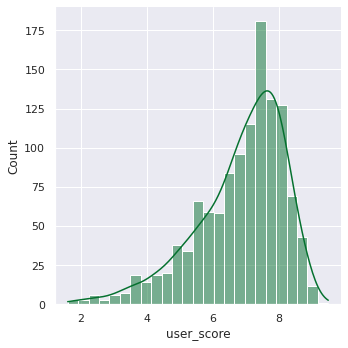

In [64]:
#визуализируем распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
sns.displot(genre_action_hyp, kde=True)

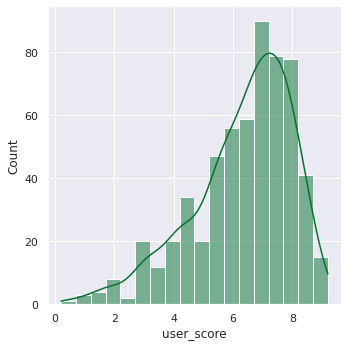

In [65]:
sns.displot(genre_sports_hyp, kde=True)

In [46]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

6.307979626485569

In [47]:
# Произведем проверку дисперсии выборок
np.var(games[games['genre']=='action']['user_score'])

2.0306366538266296

In [48]:
np.var(games[games['genre']=='sports']['user_score'])

2.5941606711770175

In [49]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


## Общий вывод

1. Перед анализом данных мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок. Привели к правильным типам данных необходимые столбцы. Определили, что аббревиатура TBD значит to be determined, to be done. То есть, данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр. За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самый популярный жанр за последние 10 лет: 'Action'. Якорем висит жанр 'Strategy'.


2. После мы составили портреты пользователей каждого региона за все года.

* Самые **популярные игровые платформы в Северной Америке** это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

* Самые **популярные игровые платформы в Европе** это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

* Самые **популярные игровые платформы в Японии** это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год **(2016)**: 

**В Северной Америке:**

* Топ игровых платформ выглядит так: PS4, Xone, DS3;
* Топ Жанров игр: Shooter, Action, Sports;
* Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".

**В Европейском Союзе:**

* Топ игровых платформ : PS4, Xone, PC;
* Топ жанров: Shooter, Sports, Action;
* Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".


**В Японии:**

* Топ игровых платформ : 3DS, PS4, PSV;
* Топ жанров: Action, Role-playing, Adventure;
* Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".


Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.